In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#load dataset
df = pd.read_csv ('https://raw.githubusercontent.com/bhanuswami026/experimental_projects/main/breast_cancer/breast-cancer.csv', na_values='?')

In [ ]:
# set column names
df.columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'Class']

In [ ]:
df.head(5)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
1,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
2,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
3,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
4,'50-59','premeno','25-29','3-5','no','2','right','left_up','yes','no-recurrence-events'


In [ ]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [ ]:
df['breast-quad'].value_counts()

'left_low'     110
'left_up'       96
'right_up'      33
'right_low'     24
'central'       21
Name: breast-quad, dtype: int64

In [ ]:
# handle missing values
df['node-caps'] = df['node-caps'].fillna(df['node-caps'].describe()[2])
df['breast-quad']= df['breast-quad'].fillna('left_low')


In [ ]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [ ]:
# defining features and target
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(df.shape)
print(x.shape)
print(y.shape)

(285, 10)
(285, 9)
(285,)


#### ENCODING CATEGORICAL VARIABLES

In [ ]:
#prepare feature variables
def prepare_inputs (x):
    oe = OrdinalEncoder()
    x =oe.fit_transform (x)
    return x
  
#prepare target variables
def prepare_targets (y):
    le = LabelEncoder()
    le.fit(y)
    y_train_enc = le.transform(y)
    return y

In [ ]:
# prepare input data
x = prepare_inputs(x)

# prepare output data
y = prepare_targets(y)

In [ ]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

#summary
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (190, 9) (190,)
Test (95, 9) (95,)


#### FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [ ]:
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=chi2, k='all')
  fs.fit(x_train, y_train)
  x_train_fs = fs.transform(x_train)
  x_test_fs = fs.transform(x_test)
  return x_train_fs, x_test_fs, fs


In [ ]:
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

Feature 0: 0.104230
Feature 1: 0.325405
Feature 2: 7.452457
Feature 3: 40.800726
Feature 4: 7.788018
Feature 5: 6.182161
Feature 6: 1.013149
Feature 7: 2.488369
Feature 8: 6.390578


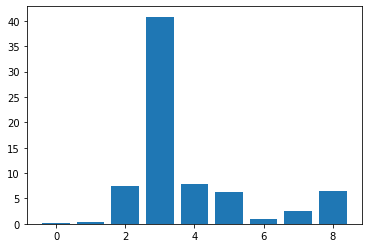

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(x_train_fs, y_train)
yhat = model.predict(x_test_fs)

In [ ]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yhat)
print(accuracy)

0.7368421052631579


### MODEL BUILDING WITH FEATURE SELECTION USING CHI-SQUARED

In [ ]:
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=chi2, k=8)
  fs.fit(x_train, y_train)
  x_train_fs = fs.transform(x_train)
  x_test_fs = fs.transform(x_test)
  return x_train_fs, x_test_fs, fs

x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

model = LogisticRegression(solver='lbfgs')
model.fit(x_train_fs, y_train)
yhat = model.predict(x_test_fs)

accuracy = accuracy_score(y_test, yhat)
print(accuracy)

0.7684210526315789


### MODEL BUILDING WITH FEATURE SELECTION USING MUTUAL INFORMATION

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def select_features(x_train, y_train, X_test):
  fs = SelectKBest(score_func=mutual_info_classif, k=7)
  fs.fit(x_train, y_train)
  x_train_fs = fs.transform(x_train)
  x_test_fs = fs.transform(x_test)
  return x_train_fs, x_test_fs, fs

x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

model = LogisticRegression(solver='lbfgs')
model.fit(x_train_fs, y_train)
yhat = model.predict(x_test_fs)

accuracy = accuracy_score(y_test, yhat)
print(accuracy)

0.7578947368421053


### COMPARISON WITH DIMENSIONALITY REDUCTION

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

model = LogisticRegression(solver='lbfgs')
model.fit(x_train_pca, y_train)
yhat = model.predict(x_test_pca)

accuracy = accuracy_score(y_test, yhat)
print(accuracy)

0.7578947368421053
